In [2]:
import pandas as pd
import numpy as np
from leela.database.database import Database
import matplotlib.pyplot as plt

In [3]:
# data = pd.read_csv(r"C:\Projects\GitHub\Leela\leela\research\Nikita\data\sample.csv",index_col=0)
data = pd.read_csv(r"C:\Projects\GitHub\Leela\leela\research\Nikita\data\30_yr.csv", index_col=0)
# data = Database.query_db("select * from fannie_processed where loan_id = '000097568237'")
# data = data.set_index("monthly_reporting_period").sort_index()
data = data.set_index("monthly_reporting_period")

C:\Users\evanl\AppData\Local\Temp\ipykernel_3848\2345394058.py:2: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Projects\GitHub\Leela\leela\research\Nikita\data\30_yr.csv", index_col=0)


In [20]:
# dropped_columns = ["reference_pool_id", "master_servicer", 
                #   "mortgage_margin", 'upb_at_issuance', 'channel', 'seller_name']

# data[[x for x in data.columns if x not in dropped_columns]]

In [34]:
print(list(data.columns))

['reference_pool_id', 'loan_id', 'channel', 'seller_name', 'servicer_name', 'master_servicer', 'original_interest_rate', 'current_interest_rate', 'original_upb', 'upb_at_issuance', 'current_actual_upb', 'original_loan_term', 'origination_date', 'first_payment_date', 'loan_age', 'remaining_months_to_legal_maturity', 'remaining_months_to_maturitry', 'maturity_date', 'oltv', 'ocltv', 'number_of_borrowers', 'dti', 'borrower_credit_score_at_origination', 'coborrower_credit_score_at_origination', 'first_time_buyer_flag', 'loan_purpose', 'property_type', 'number_of_units', 'occupancy_status', 'property_state', 'msa', 'zip_code_short', 'mortgage_insurance_pct', 'amortization_type', 'prepayment_penalty_indicator', 'interest_only_indicator', 'interest_only_first_prin_and_int_pay_dt', 'months_to_amortization', 'current_loan_delinq_status', 'loan_payment_history', 'modification_flag', 'mortgage_insurance_cancellation_indicator', 'zero_balance_code', 'zero_balance_effective_date', 'upb_at_time_of_r

In [59]:
smm_columns = ["current_actual_upb", "original_upb", "scheduled_principcal_current", "total_principal_current", "unscheduled_principal_current"]
sample[smm_columns]

,current_actual_upb,original_upb
monthly_reporting_period,,
2021-03-01,209617.19,213000.0
2021-04-01,209257.20,213000.0
2021-05-01,208896.24,213000.0
2021-06-01,208534.30,213000.0
2021-07-01,208171.38,213000.0
2021-08-01,207807.48,213000.0
2021-09-01,207442.59,213000.0
2021-10-01,207076.71,213000.0
2021-11-01,206709.84,213000.0


<AxesSubplot:xlabel='monthly_reporting_period'>

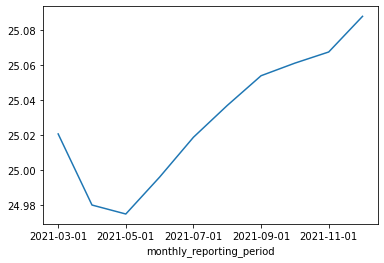

In [36]:
data["mortgage_insurance_pct"].groupby("monthly_reporting_period").mean().plot()

In [40]:
sample = data[data["loan_id"] == 99761926].copy()

In [45]:
sample = sample.sort_index()

In [51]:
data.index.unique().sort_values()

Index(['2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
      dtype='object', name='monthly_reporting_period')

Index(['2021-12-01', '2021-11-01', '2021-10-01', '2021-09-01', '2021-08-01',
       '2021-07-01', '2021-06-01', '2021-05-01', '2021-04-01', '2021-03-01'],
      dtype='object', name='monthly_reporting_period')